In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import cactas as C
import nrrd
import mahotas as mh

In [3]:
DATAPATH='/raid/mpsych/CACTAS/DATA/ESUS'

In [4]:
images, labels = C.Helper.load_data(DATAPATH)

In [5]:
images = sorted(images)

In [6]:
labels = sorted(labels)

In [7]:
# total dataset

In [8]:
len(images), len(labels)

(70, 70)

In [16]:
voxel_count = []
volume = []
intensity = []
total_plaque = []

for i in range(len(images)):
    label_data, label_header = nrrd.read(DATAPATH + "/" +labels[i])
    relabel, obj = mh.label(label_data)
    
    plaque_sizes = np.bincount(relabel.flatten())[1:]
    plaque_count = len(plaque_sizes)
    
    voxel_dimensions = label_header['space directions'][label_header['space directions'] != 0]
    voxel_volume = voxel_dimensions[0]*voxel_dimensions[1]*voxel_dimensions[2]
    
    split_array = np.split(relabel, 2)
    right_sizes = np.bincount(split_array[0].flatten())[1:]
    left_sizes = np.bincount(split_array[1].flatten())[1:]
    
    intensity.append(np.mean(relabel))
    total_plaque.append(plaque_count)
    volume.append(round(plaque_sizes[j]*voxel_volume))
    voxel_count.append(right_sizes.sum() + left_sizes.sum())

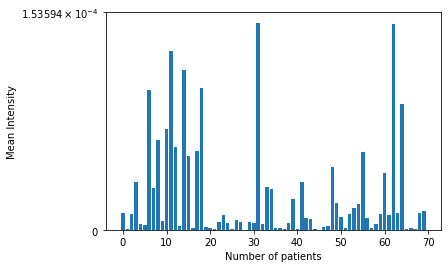

In [17]:
x = range(len(intensity))
plt.yscale('symlog')
plt.bar(x,intensity)
plt.xlabel('Number of patients')
plt.ylabel('Mean Intensity')
plt.show()

In [21]:
min(intensity), max(intensity)

(1.2969970703125e-07, 0.00014628012349286417)

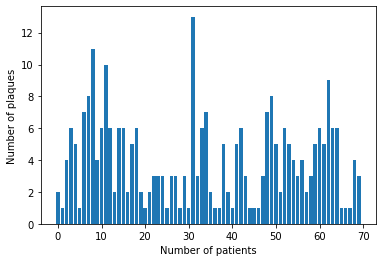

In [26]:
total_plaque = list(map(int, total_plaque))

x1 = range(len(total_plaque))
plt.bar(x1,total_plaque)
plt.xlabel('Number of patients')
plt.ylabel('Number of plaques')
plt.show()

In [27]:
min(total_plaque), max(total_plaque)

(1, 13)

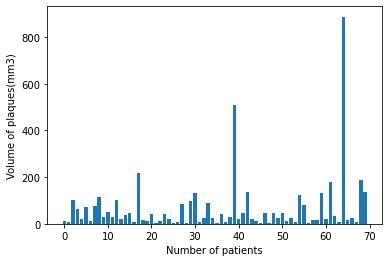

In [28]:
x2 = range(len(volume))
plt.bar(x2,volume)
plt.xlabel('Number of patients')
plt.ylabel('Volume of plaques(mm3)')
plt.show()

In [29]:
min(volume), max(volume)

(2, 887)

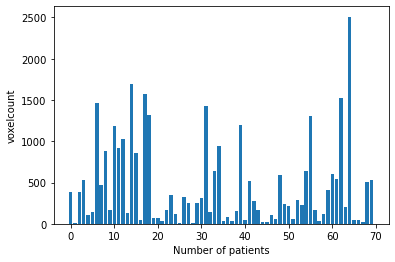

In [31]:
x3 = range(len(voxel_count))
plt.bar(x3,voxel_count)
plt.xlabel('Number of patients')
plt.ylabel('voxelcount')
plt.show()

In [32]:
min(voxel_count), max(voxel_count)

(11, 2509)

In [ ]:
# reference: https://github.com/jiehyunjkim/cs410_upenn/blob/master/experiments/upenn_plaque_features_oo_v1.py